# Solve Cliff task using RLLib

## Resources:
* https://docs.ray.io/en/latest/rllib.html - RLLib documentation
* https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py - OpenAI Gym Cliff walking environment
* https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html - DQN algorithm description
* https://github.com/anyscale/academy/blob/master/ray-rllib/explore-rllib/extras/Extra-Application-Frozen-Lake.ipynb - Ray RLlib Example FrozenLake-v0 environment

## Installation RLLib

In [6]:
import os
import shutil
import sys
import json
import ray
import ray.rllib.agents.ppo as ppo
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

## Init RLlib and path to logging 

In [2]:
info = ray.init(ignore_reinit_error=True)
print("Dashboard URL: http://{}".format(info["webui_url"]))
checkpoint_root = "logdata/cliff_walking"
shutil.rmtree(checkpoint_root, ignore_errors=True, onerror=None)

2020-12-24 19:37:47,802	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265


Dashboard URL: http://127.0.0.1:8265


## Import Cliff walking environment from OpenAI Gym

In [3]:
SELECT_ENV = "CliffWalking-v0"
N_ITER = 100
config = ppo.DEFAULT_CONFIG.copy()
config["log_level"] = "ERROR"
agent = ppo.PPOTrainer(config, env=SELECT_ENV)

2020-12-24 19:37:51,290	INFO trainer.py:591 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2020-12-24 19:37:51,291	INFO trainer.py:618 -- Current log_level is ERROR. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=19720) WARNING:tensorflow:From C:\Users\u373288\AppData\Local\Continuum\anaconda3\envs\Jupyter_lab_env\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:88: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=19720) Instructions for updating:
(pid=19720) non-resource variables are not supported in the long term
(pid=10488) WARNING:tensorflow:From C:\Users\u373288\AppData\Local\Continuum\anaconda3\envs\Jupyter_lab_env\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:88: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2020-12-24 19:38:00,612	WARNING util.py:43 -- Install gputil for GPU system monitoring.


## Train

In [4]:
results = []
episode_data = []
episode_json = []

for n in range(N_ITER):
    result = agent.train()
    results.append(result)
    
    episode = {'n': n, 
               'episode_reward_min': result['episode_reward_min'], 
               'episode_reward_mean': result['episode_reward_mean'], 
               'episode_reward_max': result['episode_reward_max'],  
               'episode_len_mean': result['episode_len_mean']
              }
    
    episode_data.append(episode)
    episode_json.append(json.dumps(episode))
    file_name = agent.save(checkpoint_root)
    
    print(f'{n+1:3d}: Min/Mean/Max reward: {result["episode_reward_min"]:8.4f}/{result["episode_reward_mean"]:8.4f}/{result["episode_reward_max"]:8.4f}, len mean: {result["episode_len_mean"]:8.4f}. Checkpoint saved to {file_name}')

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


(pid=19720) WARNING:tensorflow:From C:\Users\u373288\AppData\Local\Continuum\anaconda3\envs\Jupyter_lab_env\lib\site-packages\ray\rllib\policy\tf_policy.py:852: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=19720) Instructions for updating:
(pid=19720) Prefer Variable.assign which has equivalent behavior in 2.X.
(pid=10488) WARNING:tensorflow:From C:\Users\u373288\AppData\Local\Continuum\anaconda3\envs\Jupyter_lab_env\lib\site-packages\ray\rllib\policy\tf_policy.py:852: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=10488) Instructions for updating:
(pid=10488) Prefer Variable.assign which has equivalent behavior in 2.X.


  1: Min/Mean/Max reward:      nan/     nan/     nan, len mean:      nan. Checkpoint saved to logdata/cliff_walking\checkpoint_1\checkpoint-1
  2: Min/Mean/Max reward: -27523.0000/-27523.0000/-27523.0000, len mean: 2872.0000. Checkpoint saved to logdata/cliff_walking\checkpoint_2\checkpoint-2
  3: Min/Mean/Max reward: -27523.0000/-27523.0000/-27523.0000, len mean: 2872.0000. Checkpoint saved to logdata/cliff_walking\checkpoint_3\checkpoint-3
  4: Min/Mean/Max reward: -27523.0000/-27523.0000/-27523.0000, len mean: 2872.0000. Checkpoint saved to logdata/cliff_walking\checkpoint_4\checkpoint-4
  5: Min/Mean/Max reward: -27523.0000/-21120.0000/-14717.0000, len mean: 4141.5000. Checkpoint saved to logdata/cliff_walking\checkpoint_5\checkpoint-5
  6: Min/Mean/Max reward: -27523.0000/-21120.0000/-14717.0000, len mean: 4141.5000. Checkpoint saved to logdata/cliff_walking\checkpoint_6\checkpoint-6
  7: Min/Mean/Max reward: -27523.0000/-21120.0000/-14717.0000, len mean: 4141.5000. Checkpoint sav

## Show model details

In [5]:
import pprint
policy = agent.get_policy()
model = policy.model
pprint.pprint(model.variables())
pprint.pprint(model.value_function())
print(model.base_model.summary())

[<tf.Variable 'default_policy/fc_1/kernel:0' shape=(48, 256) dtype=float32>,
 <tf.Variable 'default_policy/fc_1/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'default_policy/fc_value_1/kernel:0' shape=(48, 256) dtype=float32>,
 <tf.Variable 'default_policy/fc_value_1/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'default_policy/fc_2/kernel:0' shape=(256, 256) dtype=float32>,
 <tf.Variable 'default_policy/fc_2/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'default_policy/fc_value_2/kernel:0' shape=(256, 256) dtype=float32>,
 <tf.Variable 'default_policy/fc_value_2/bias:0' shape=(256,) dtype=float32>,
 <tf.Variable 'default_policy/fc_out/kernel:0' shape=(256, 4) dtype=float32>,
 <tf.Variable 'default_policy/fc_out/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'default_policy/value_out/kernel:0' shape=(256, 1) dtype=float32>,
 <tf.Variable 'default_policy/value_out/bias:0' shape=(1,) dtype=float32>]
<tf.Tensor 'Reshape:0' shape=(?,) dtype=float32>
Model: "model"
________

In [6]:
ray.shutdown()

## Display results

In [9]:
!rllib rollout \
    logdata/cliff_walking/checkpoint_92/checkpoint-92 \
    --config "{\"env\": \"CliffWalking-v0\"}" \
    --run PPO \
    --steps 13

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


Instructions for updating:
non-resource variables are not supported in the long term
2020-12-24 19:47:11,646	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265
2020-12-24 19:47:15,090	INFO trainer.py:591 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2020-12-24 19:47:15,090	INFO trainer.py:618 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=17840) WARNING:tensorflow:From c:\users\u373288\appdata\local\continuum\anaconda3\envs\jupyter_lab_env\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:88: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.

(pid=17840) Instructions for updating:

(pid=17840) non-resource variables are not supported in the long term

(pid=20248) WARNING:tensorflow:From c:\users\u373288\appdata\local\continuum\anaconda3\envs\jupyter_lab_env\lib\site-pack


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  x  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  x  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  x  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  x  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  

(pid=17840) Instructions for updating:

(pid=17840) If using Keras pass *_constraint arguments to layers.

(pid=20248) WARNING:tensorflow:From c:\users\u373288\appdata\local\continuum\anaconda3\envs\jupyter_lab_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1635: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.

(pid=20248) Instructions for updating:

(pid=20248) If using Keras pass *_constraint arguments to layers.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-12-24 19:47:24,517	WARNING util.py:43 -- Install gputil for GPU system monitoring.
2020-12-24 19:47:24,662	INFO trainable.py:329 -- Restored on 192.168.1.34 from checkpoint: logdata/cliff_walking/checkpoint_92/checkpoint-92
2020-12-24 19:47:24,662	INFO trainable.py:336 -- Current state after restoring: {'_iteration': 92, '_timesteps_total': None, '_time


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Episode #0: reward: -13.0


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("rewards.csv", header=None )

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,NaN,1:,Min,Mean,Max,reward:,NaN,NaN,NaN,NaN,NaN,len,mean:,nan.,Checkpoint,saved,to,logdata,cliff_walking\checkpoint_1\checkpoint-1
1,NaN,2:,Min,Mean,Max,reward:,-27523.0,-27523.0,-27523.0,len,mean:,2872.0000.,Checkpoint,saved,to,logdata,cliff_walking\checkpoint_2\checkpoint-2,NaN,NaN
2,NaN,3:,Min,Mean,Max,reward:,-27523.0,-27523.0,-27523.0,len,mean:,2872.0000.,Checkpoint,saved,to,logdata,cliff_walking\checkpoint_3\checkpoint-3,NaN,NaN
3,NaN,4:,Min,Mean,Max,reward:,-27523.0,-27523.0,-27523.0,len,mean:,2872.0000.,Checkpoint,saved,to,logdata,cliff_walking\checkpoint_4\checkpoint-4,NaN,NaN
4,NaN,5:,Min,Mean,Max,reward:,-27523.0,-21120.0,-14717.0,len,mean:,4141.5000.,Checkpoint,saved,to,logdata,cliff_walking\checkpoint_5\checkpoint-5,NaN,NaN


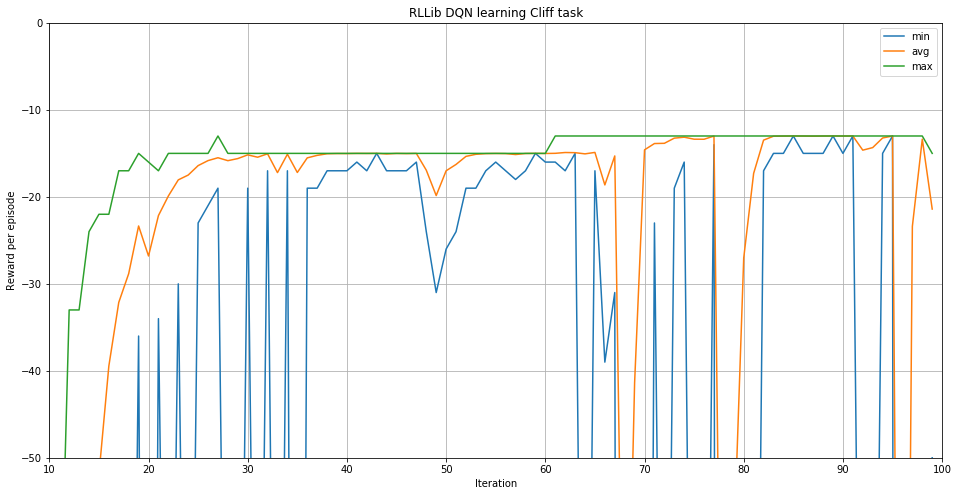

In [34]:
figsize=(16, 8)
plt.figure(figsize=figsize)
plt.title("RLLib DQN learning Cliff task")
rew_plot_min = plt.plot(df[6], label='min')
rew_plot_avg = plt.plot(df[7], label='avg')
rew_plot_max = plt.plot(df[8], label='max')
plt.grid(True)
plt.legend()
plt.ylabel("Reward per episode")
plt.xlabel("Iteration")
plt.xlim([10, 100])
plt.ylim([-50, 0])
plt.show()